In [1]:
import pandas as pd
import numpy as np
import joblib
import time
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('../data/credit.csv')
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [5]:
df.describe(include='all')


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [6]:
df.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

## EDA

In [8]:
df['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

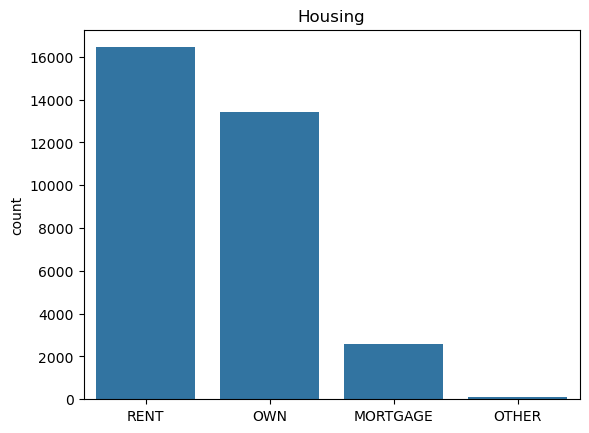

In [9]:
sns.barplot(x=df['person_home_ownership'].unique(), y=df['person_home_ownership'].value_counts())
plt.title('Housing')
plt.show()

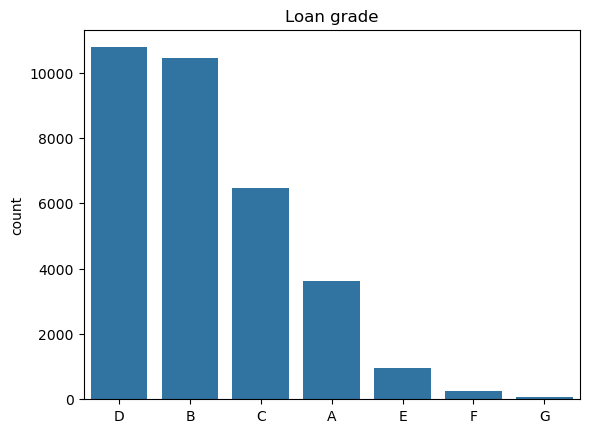

In [10]:
sns.barplot(x=df['loan_grade'].unique(), y=df['loan_grade'].value_counts())
plt.title('Loan grade')
plt.show()


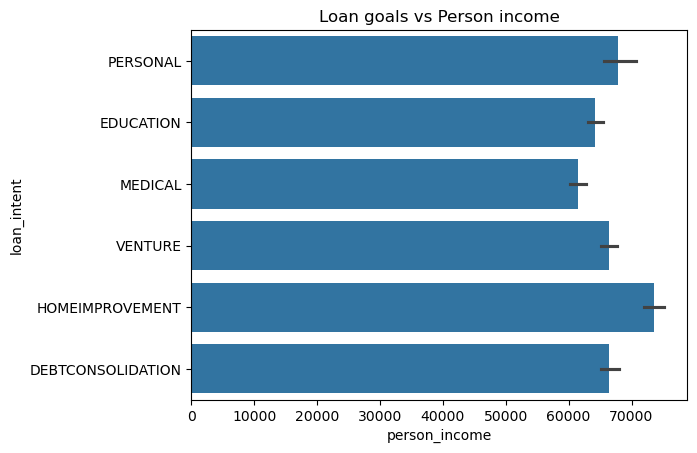

In [11]:
sns.barplot(x=df["person_income"],y=df["loan_intent"])
plt.title("Loan goals vs Person income")
plt.show()


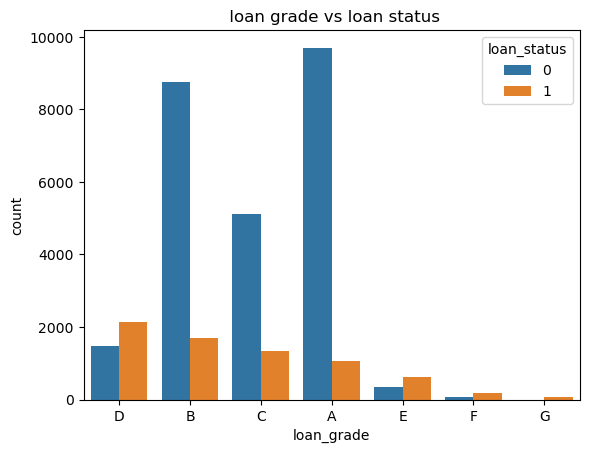

In [12]:
sns.countplot(data = df, x = 'loan_grade', hue = 'loan_status')
plt.title(" loan grade vs loan status")
plt.show()


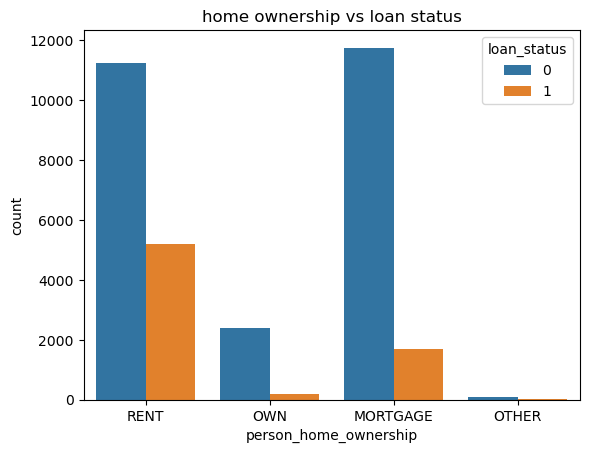

In [13]:
sns.countplot(data = df, x = 'person_home_ownership', hue = 'loan_status')
plt.title("home ownership vs loan status")
plt.show()


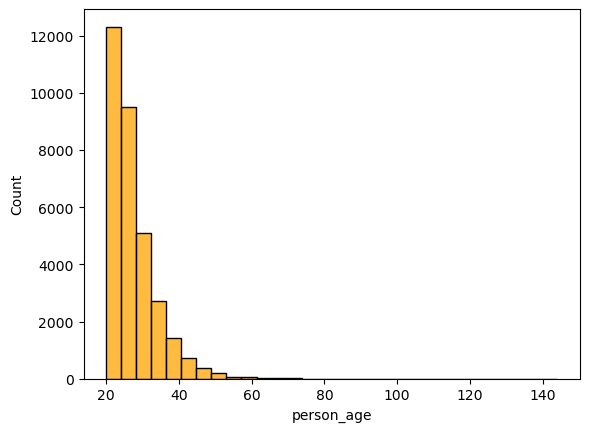

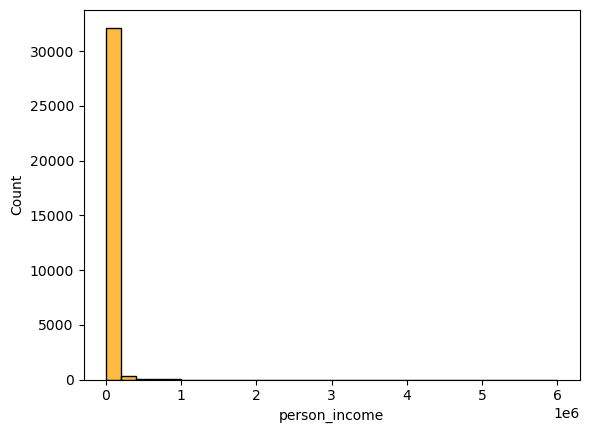

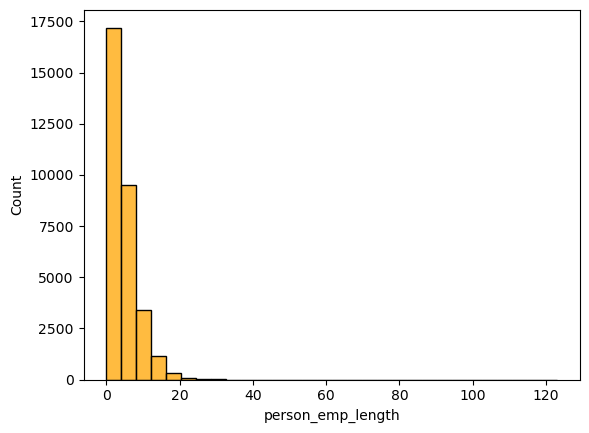

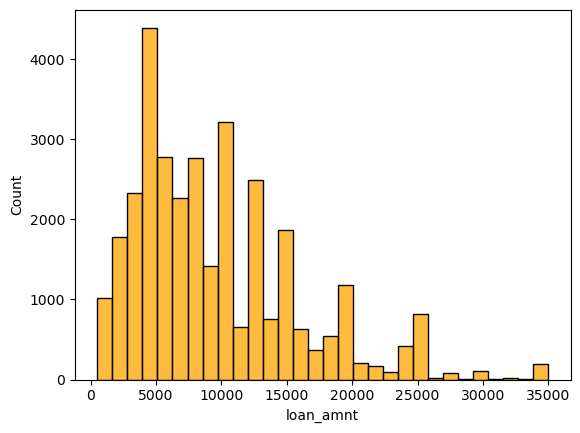

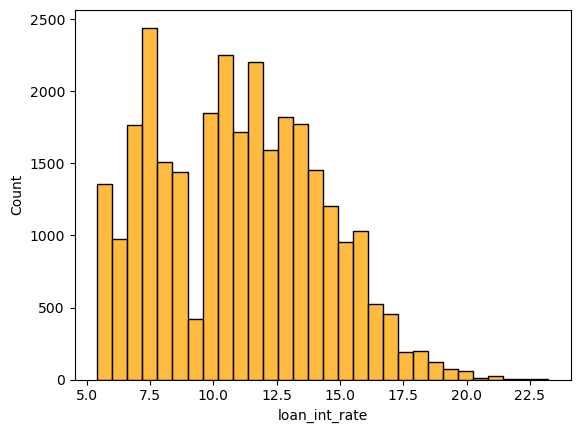

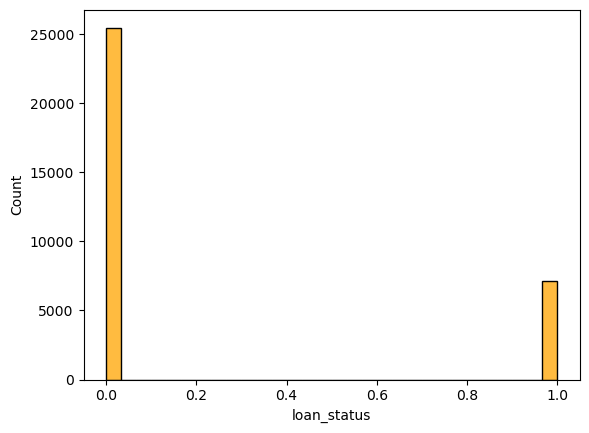

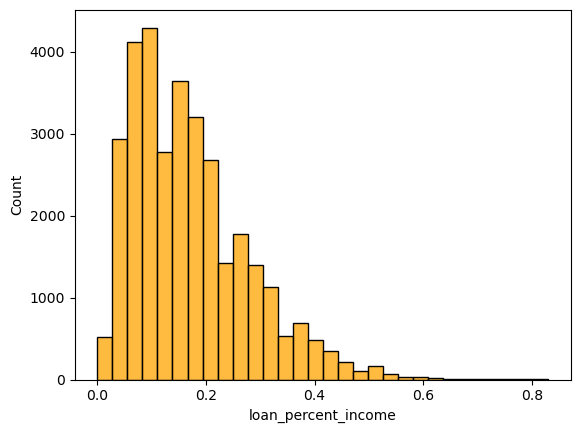

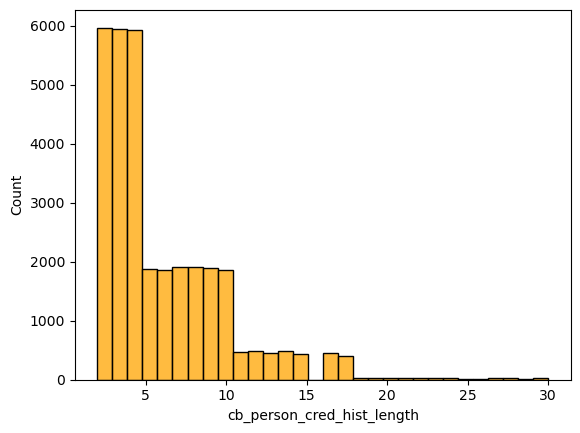

In [14]:
numerical_columns= df.select_dtypes(include=np.number)

for col in numerical_columns:
    sns.histplot( data=df , x=col , bins=30, color='orange')
    plt.show()


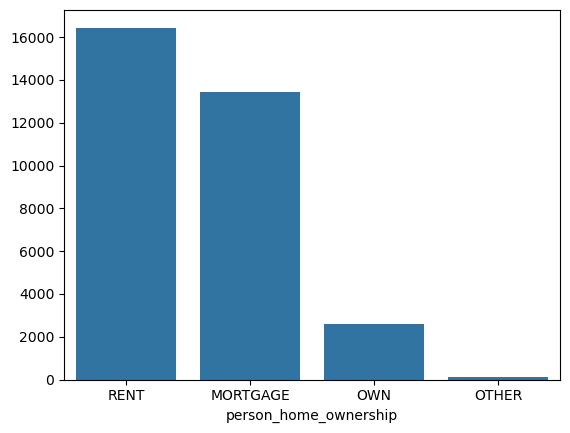

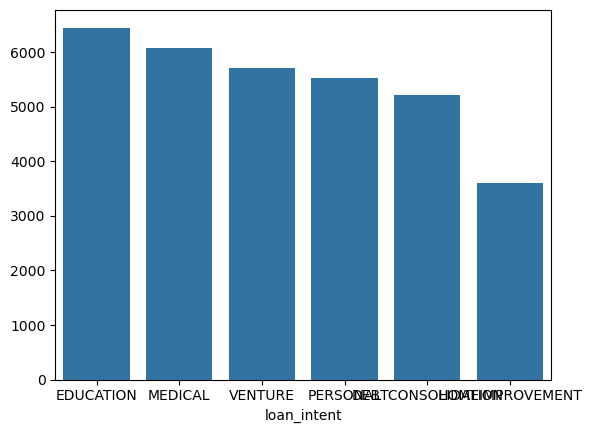

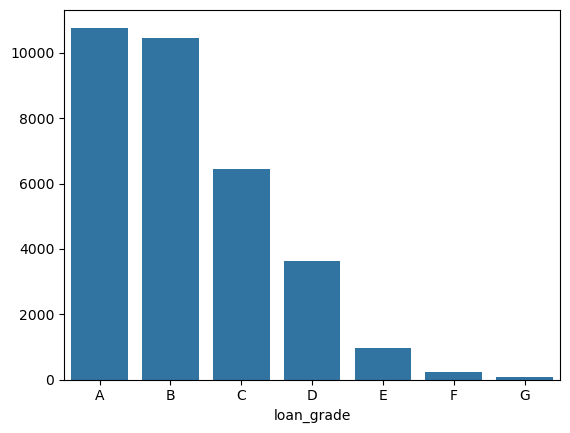

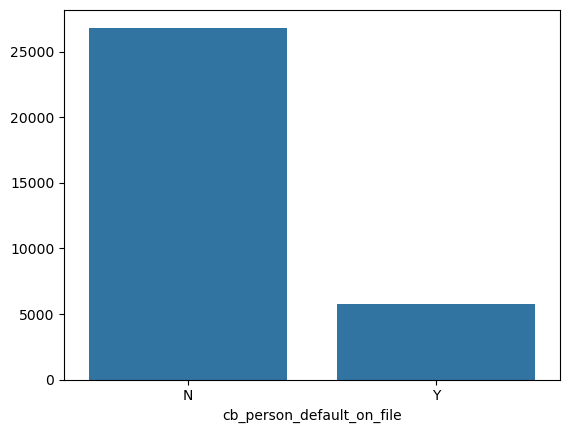

In [15]:
categorical_features= df.select_dtypes(include='object').columns.tolist()

for cat in categorical_features:
    sns.barplot( x=df[cat].value_counts().index, y= df[cat].value_counts().values)
    plt.show()

In [16]:
for i in numerical_columns:
    print(i)
    print(stats.describe(df[i]))
    print(stats.shapiro(df[i]))

person_age
DescribeResult(nobs=32581, minmax=(20, 144), mean=27.73459992019889, variance=40.29809961663474, skewness=2.5812736796698657, kurtosis=18.557792324565625)
ShapiroResult(statistic=0.805733839907371, pvalue=6.763663890189861e-104)
person_income
DescribeResult(nobs=32581, minmax=(4000, 6000000), mean=66074.84846996715, variance=3841907061.8142085, skewness=32.86383572338852, kurtosis=2692.8592897449143)
ShapiroResult(statistic=0.4310875569412337, pvalue=1.3292808262437599e-133)
person_emp_length
DescribeResult(nobs=32581, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)
ShapiroResult(statistic=nan, pvalue=nan)
loan_amnt
DescribeResult(nobs=32581, minmax=(500, 35000), mean=9589.371105859243, variance=39968779.55690482, skewness=1.192422526473502, kurtosis=1.4231627003417104)
ShapiroResult(statistic=0.9068545012881686, pvalue=9.332793261491047e-86)
loan_int_rate
DescribeResult(nobs=32581, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)

C:\Users\sudwa\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 32581.
  res = hypotest_fun_out(*samples, **kwds)


## Pre-processing

In [17]:
df.duplicated().sum()

165

In [18]:
# drop with age >80 
df = df.drop(df[df['person_age'] > 80].index)

In [19]:
# new approch
data=df.copy()

In [20]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3114
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [21]:
df.dropna(axis=0,inplace=True)

In [22]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [23]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in categorical_features:
    df[i] = le.fit_transform(df[i])

df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


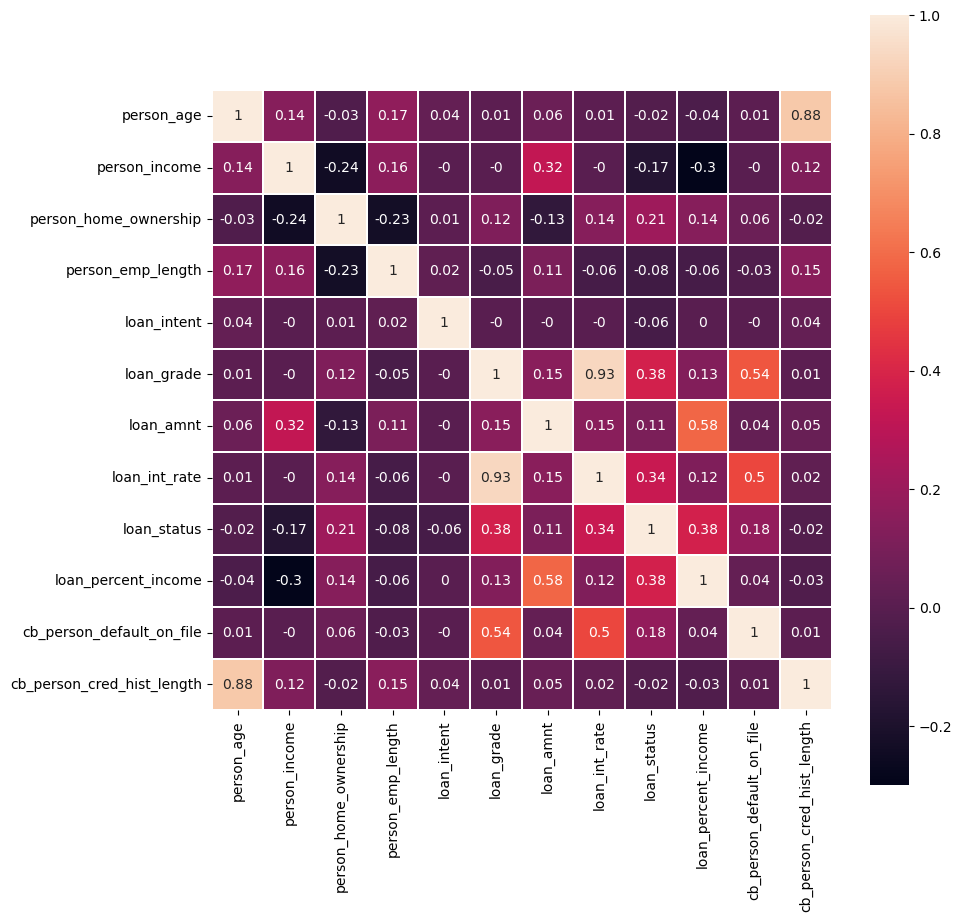

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df.corr(), 2),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()


## Features and Target

In [25]:
# Select features and target variable
X = df.drop(['loan_status'],axis = 1)
y =df['loan_status']

In [26]:
# initial modeling
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
Xscale  = scaler.fit_transform(X)
Xscale
#test_scaled = scaler.transform(X_test)

array([[-0.92645143, -0.14412286,  0.91968713, ...,  3.95252931,
         2.14732697, -0.69202916],
       [-1.08870949, -1.10240194,  0.22255679, ..., -0.6533087 ,
        -0.46569526, -0.93982345],
       [-0.43967724, -1.10240194, -1.1717039 , ...,  3.76453592,
        -0.46569526, -0.69202916],
       ...,
       [ 6.05064523,  0.18564929,  0.91968713, ...,  2.73057228,
        -0.46569526,  5.50282823],
       [ 4.59032267,  1.62112807, -1.1717039 , ..., -0.6533087 ,
        -0.46569526,  5.00723964],
       [ 6.21290329, -0.47389501,  0.91968713, ..., -0.18332523,
        -0.46569526,  5.99841682]])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xscale, y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22906, 11), (5727, 11), (22906,), (5727,))

In [28]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_res, y_res = smt.fit_resample(X_train, y_train)
print(f'after train split: ,{X_res.shape, y_res.shape}')

X_res, y_res = smt.fit_resample(Xscale, y)
print(f'before train split after scale: ,{X_res.shape, y_res.shape}')

X_res, y_res = smt.fit_resample(X, y)
print(f'before scale: ,{X_res.shape, y_res.shape}')

after train split: ,((35834, 11), (35834,))
before train split after scale: ,((44860, 11), (44860,))
before scale: ,((44860, 11), (44860,))


In [29]:
# Preprocessing, modelling and evaluating
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report, f1_score,precision_score,recall_score, roc_auc_score
from sklearn.metrics import make_scorer, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict 
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb

In [30]:
lr = LinearRegression().fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("LinearRegression:")
print(f'training accuracy:{lr.score(X_train,y_train)}')
print(f'Testing accuracy:{lr.score(X_test,y_test)}')


LinearRegression:
training accuracy:0.2962100644685657
Testing accuracy:0.30898140520421746


In [31]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [32]:
# !pip install lightgbm

In [33]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "LogisticRegression": LogisticRegression(),
    "Support Vector Classifier": SVC(gamma='auto'),
    # "AdaBoost Classifier": AdaBoostClassifier(),
    "Lightgbm Classifier": lgb.LGBMClassifier()

}

In [34]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [35]:
# Pass raw scale data
model_report =evaluate_models(X=Xscale, y=y, models=models)

Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9998
- Precision: 1.0000
- Recall: 0.9996
- Roc Auc Score: 0.9998
----------------------------------
Model performance for Test set
- Accuracy: 0.9328
- F1 score: 0.8161
- Precision: 0.9716
- Recall: 0.7035
- Roc Auc Score: 0.8490


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8905
- F1 score: 0.7477
- Precision: 0.7309
- Recall: 0.7652
- Roc Auc Score: 0.8447


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9253
- F1 score: 0.8024
- Precision: 0.9468
- Recall: 0.6961
- Roc Auc Score: 0.8426
----------------------------------
Model performance for Test set
- Accuracy: 0.9277
- F1 score: 0.8032
- Precision: 0.9494
- Recall: 0.6960
- Roc Auc Score: 0.8430


K-Neighbors Classifier
Model performance for Traini

In [36]:
# Result models
model_report

,Model Name,Accuracy
7,Lightgbm Classifier,0.937489
4,XGBClassifier,0.937314
0,Random Forest,0.932775
2,Gradient Boosting,0.927711
1,Decision Tree,0.890519
6,Support Vector Classifier,0.888423
3,K-Neighbors Classifier,0.881439
5,LogisticRegression,0.852977


In [38]:
# Hypertunning Random_search and Grid_Search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kf = KFold(n_splits=30)


xgboost_params = {
    'max_depth': range(2, 10, 2),
    'min_child_weight':range (1, 10, 2)

}
lgbm_params={
    'n_estimators': range(1,10,1),
    'learning_rate': [0.5,1],
    'max_bin': [255]
}

grid_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("LGBM", lgb.LGBMClassifier(), lgbm_params)
]

model_param = {}
for name, model, param_grid in grid_models:
    print(name, model, param_grid)
    gsc = GridSearchCV(estimator=model,
                                param_grid=param_grid,
                                   cv=kf,
                                   verbose=2, 
                                   n_jobs=-1)
    gsc.fit(X_train, y_train)
    model_param[name] = gsc.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

XGBoost XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) {'max_depth': range(2, 10, 2), 'min_child_weight': range(1, 10, 2)}
Fitting 30 folds for each of 20 candidates, totalling 600 fits
LGBM LGBMClassifier() {'n_estimators': range(1, 10), 'learning_rate': [0.5, 1], 'max_bin': [255]}
Fitti

In [39]:
model_param

{'XGBoost': {'max_depth': 8, 'min_child_weight': 3},
 'LGBM': {'learning_rate': 0.5, 'max_bin': 255, 'n_estimators': 8}}

In [40]:
# Testing with different dataset
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
    "LGBMClassifier": lgb.LGBMClassifier(**model_param['LGBM'])
}
tuned_report =evaluate_models(X=Xscale, y=y, models=best_models)

XGBClassifier
Model performance for Training set
- Accuracy: 0.9732
- F1 score: 0.9345
- Precision: 0.9986
- Recall: 0.8781
- Roc Auc Score: 0.9389
----------------------------------
Model performance for Test set
- Accuracy: 0.9361
- F1 score: 0.8298
- Precision: 0.9530
- Recall: 0.7348
- Roc Auc Score: 0.8625


[LightGBM] [Info] Number of positive: 4989, number of negative: 17917
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 22906, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217803 -> initscore=-1.278514
[LightGBM] [Info] Start training from score -1.278514
LGBMClassifier
Model performance for Training set
- Accuracy: 0.9378
- F1 score: 0.8374
- Precision: 0.9719
- Recall: 0.7356
- Roc Auc Score: 0.8649
----------------------------------
Model per

In [41]:
tuned_report

,Model Name,Accuracy
0,XGBClassifier,0.936092
1,LGBMClassifier,0.935394


In [ ]:

params={'max_depth' :8, 'min_child_weight': 3}
best_model = XGBClassifier(**model_param['XGBoost'])
# best_model = XGBClassifier(**model_param['XGBoost'])
best_model = best_model.fit(X_train,y_train)
y_pred_best = best_model.predict(X_test)
test_score = accuracy_score(y_test,y_pred_best)
cr = classification_report(y_test,y_pred_best)

print("FINAL MODEL 'XGBoost'")
print(f'Training Accuracy: {best_model.score(X_train,y_train)}')
print("Testing Accuracy Score: {:.4f}".format(test_score))
print (cr)


FINAL MODEL 'XGBoost'
Training Accuracy: 0.9731947961232865
Testing Accuracy Score: 0.9361
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4513
           1       0.95      0.73      0.83      1214

    accuracy                           0.94      5727
   macro avg       0.94      0.86      0.90      5727
weighted avg       0.94      0.94      0.93      5727



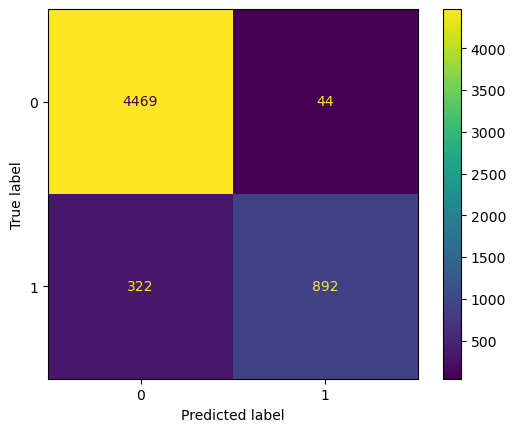

In [43]:
# ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

<Axes: >

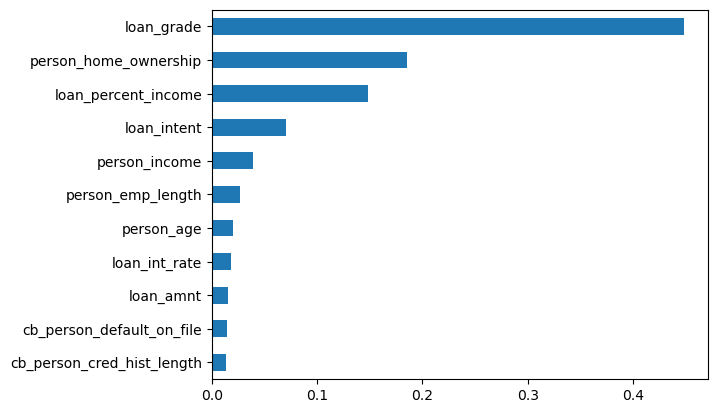

In [44]:
from matplotlib.pyplot import figure
feat_importances = pd.Series(best_model.feature_importances_, index = X.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')

In [45]:
# Save best xgboost model
import joblib
import os

print(f"Best model: {best_model}")
joblib.dump(best_model, 'model.pkl')

Best model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


['model.pkl']

## Evaluate

In [46]:
path = open('model.pkl','rb')
model = joblib.load(path)

In [47]:
df.iloc[300]

person_age                       24.00
person_income                 15600.00
person_home_ownership             2.00
person_emp_length                 5.00
loan_intent                       2.00
loan_grade                        0.00
loan_amnt                      3300.00
loan_int_rate                     6.39
loan_status                       1.00
loan_percent_income               0.21
cb_person_default_on_file         0.00
cb_person_cred_hist_length        4.00
Name: 338, dtype: float64

In [48]:
trys=X.iloc[300].values.reshape(1,-1)
trys

array([[2.40e+01, 1.56e+04, 2.00e+00, 5.00e+00, 2.00e+00, 0.00e+00,
        3.30e+03, 6.39e+00, 2.10e-01, 0.00e+00, 4.00e+00]])

In [49]:
est1=scaler.transform(trys)
est1
# data=[[21,   0, 630,   1,  13,   4,   2,   1,   1,   2,   2,   1,   2,
#          1,   1,   2,   0,   0,   2,   2]]

C:\Users\sudwa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.6019353 , -0.98601177,  0.22255679,  0.05086607, -0.3071136 ,
        -1.04900731, -1.00425314, -1.43981436,  0.38065493, -0.46569526,
        -0.44423486]])

In [50]:
model.predict(est1)[0]

1

In [ ]:
# !pip install xgboost
# !pip install hyperopt

In [ ]:
from xgboost import XGBClassifier
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score, \
                            roc_curve,confusion_matrix


space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180
    }


def hyperparameter_tuning(space):
    model = xgb.XGBClassifier(n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                         reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                         colsample_bytree=int(space['colsample_bytree']))
    # evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    model.fit(X_train, y_train)
            # eval_set=evaluation, eval_metric="rmse",
            # early_stopping_rounds=10,verbose=False)

    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print ("SCORE:", accuracy)
    #change the metric if you like
    return {'loss': -accuracy, 'status': STATUS_OK, 'model': model}


trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

In [ ]:
print(best)

In [51]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [52]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [71]:
# Building pipeline
# from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

x = data.drop(['loan_status'],axis = 1)
y = data['loan_status']

num_features = x.select_dtypes(include=['int64', 'float64']).columns
cat_features = x.select_dtypes(include=['object']).columns

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

num_transformer = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])


# X_train_transformed = preprocessor.fit_transform(X_train)
# X_test_transformed = preprocessor.transform(X_test)
clf= XGBClassifier(**model_param['XGBoost'])

pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE()),  # Apply SMOTE for oversampling
        ('classifier', clf)  # Use the current model
        ])

# Fit the pipeline
pipeline.fit(X_train, y_train)
ypred = pipeline.predict(X_test)
test_score = accuracy_score(y_test,ypred)
cr = classification_report(y_test,ypred)

print("FINAL MODEL")
print("Training Accuracy Score: {:.4f}".format(pipeline.score(X_train,y_train)))
print("Testing Accuracy Score: {:.4f}".format(test_score))
print (cr)

(26059, 11) (6515, 11) (26059,) (6515,)
FINAL MODEL
Training Accuracy Score: 0.9675
Testing Accuracy Score: 0.9365
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      5119
           1       0.94      0.75      0.83      1396

    accuracy                           0.94      6515
   macro avg       0.94      0.87      0.90      6515
weighted avg       0.94      0.94      0.93      6515



In [72]:
# without smote
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
# from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

x = data.drop(['loan_status'],axis = 1)
y = data['loan_status']

num_features = x.select_dtypes(include=['int64', 'float64']).columns
cat_features = x.select_dtypes(include=['object']).columns

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

num_transformer = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])


# X_train_transformed = preprocessor.fit_transform(X_train)
# X_test_transformed = preprocessor.transform(X_test)
clf= XGBClassifier(**model_param['XGBoost'])

pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        # ('smote', SMOTE()),  # Apply SMOTE for oversampling
        ('classifier', clf)  # Use the current model
        ])

# Fit the pipeline
pipeline.fit(X_train, y_train)
ypred = pipeline.predict(X_test)
test_score = accuracy_score(y_test,ypred)
cr = classification_report(y_test,ypred)

print("FINAL MODEL")
print("Training Accuracy Score: {:.4f}".format(pipeline.score(X_train,y_train)))
print("Testing Accuracy Score: {:.4f}".format(test_score))
print (cr)

(26059, 11) (6515, 11) (26059,) (6515,)
FINAL MODEL
Training Accuracy Score: 0.9660
Testing Accuracy Score: 0.9377
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      5119
           1       0.94      0.76      0.84      1396

    accuracy                           0.94      6515
   macro avg       0.94      0.87      0.90      6515
weighted avg       0.94      0.94      0.94      6515

